# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#testing to see if the api works

url = 'https://api.openweathermap.org/data/2.5/weather?units=imperial&appid='+weather_api_key
city_url=url+'&q=bakersfield'
city_weather=requests.get(city_url).json()
city_weather

{'coord': {'lon': -119.0187, 'lat': 35.3733},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 51.31,
  'feels_like': 48.87,
  'temp_min': 46.02,
  'temp_max': 52.84,
  'pressure': 1027,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 0},
 'dt': 1675732100,
 'sys': {'type': 1,
  'id': 3419,
  'country': 'US',
  'sunrise': 1675695097,
  'sunset': 1675733323},
 'timezone': -28800,
 'id': 5325738,
 'name': 'Bakersfield',
 'cod': 200}

In [4]:
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']
city_country

'US'

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?units=imperial&appid='+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+'&q='+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ulladulla
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | trairi
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | susanville
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ayan
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | coulihaut
City not found. Skipping...
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | shimoda
Processing Record 17 of Set 1 | karratha
Processing Record 18 of Set 1 | pionerskiy
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | lompoc
Processing

City not found. Skipping...
Processing Record 38 of Set 4 | dikson
Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | irtyshskiy
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | yanan
City not found. Skipping...
Processing Record 44 of Set 4 | belyy yar
Processing Record 45 of Set 4 | speightstown
Processing Record 46 of Set 4 | burica
City not found. Skipping...
Processing Record 47 of Set 4 | avarua
Processing Record 48 of Set 4 | brae
Processing Record 49 of Set 4 | allonnes
Processing Record 0 of Set 5 | esperance
Processing Record 1 of Set 5 | jamestown
Processing Record 2 of Set 5 | jawhar
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | bredasdorp
Processing Record 5 of Set 5 | bandarbeyla
Processing Record 6 of Set 5 | mahajanga
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | port hardy
Processing Record 9 of Set 5 

Processing Record 27 of Set 8 | tucumcari
Processing Record 28 of Set 8 | arlit
Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | skalnyy
City not found. Skipping...
Processing Record 31 of Set 8 | kahului
Processing Record 32 of Set 8 | novikovo
Processing Record 33 of Set 8 | lakes entrance
Processing Record 34 of Set 8 | vestmannaeyjar
Processing Record 35 of Set 8 | sharan
Processing Record 36 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 8 | mayo
Processing Record 38 of Set 8 | sarh
Processing Record 39 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 40 of Set 8 | shiyan
Processing Record 41 of Set 8 | ostrovnoy
Processing Record 42 of Set 8 | tuktoyaktuk
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | ozinki
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | san quintin
Processing Record 47 of Set 8 | date
Processing Record 48 of Set 8 | macaboboni
City

Processing Record 16 of Set 12 | burns lake
Processing Record 17 of Set 12 | prince rupert
Processing Record 18 of Set 12 | milkovo
Processing Record 19 of Set 12 | pundaguitan
Processing Record 20 of Set 12 | yanchukan
City not found. Skipping...
Processing Record 21 of Set 12 | coahuayana
Processing Record 22 of Set 12 | anloga
Processing Record 23 of Set 12 | tromso
Processing Record 24 of Set 12 | benemerito de las americas
Processing Record 25 of Set 12 | mao
Processing Record 26 of Set 12 | brive-la-gaillarde
Processing Record 27 of Set 12 | pacific grove
Processing Record 28 of Set 12 | honiara
Processing Record 29 of Set 12 | alofi
Processing Record 30 of Set 12 | sao jose da coroa grande
Processing Record 31 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 32 of Set 12 | tommot
Processing Record 33 of Set 12 | carandai
Processing Record 34 of Set 12 | berlevag
Processing Record 35 of Set 12 | den helder
Processing Record 36 of Set 12 | warrington
Proces

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ulladulla,-35.3500,150.4667,68.18,89,100,7.65,AU,1675732267
1,hilo,19.7297,-155.0900,81.28,77,75,10.36,US,1675732268
2,saint george,37.1041,-113.5841,50.43,39,0,19.57,US,1675732259
3,cape town,-33.9258,18.4232,74.37,86,100,10.36,ZA,1675732269
4,trairi,-3.2778,-39.2689,77.74,82,100,6.31,BR,1675731979


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulladulla,-35.3500,150.4667,68.18,89,100,7.65,AU,1675732267
1,hilo,19.7297,-155.0900,81.28,77,75,10.36,US,1675732268
2,saint george,37.1041,-113.5841,50.43,39,0,19.57,US,1675732259
3,cape town,-33.9258,18.4232,74.37,86,100,10.36,ZA,1675732269
4,trairi,-3.2778,-39.2689,77.74,82,100,6.31,BR,1675731979


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

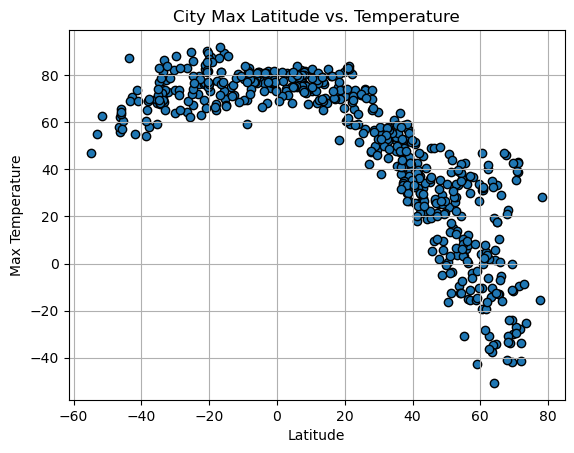

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolor='black', marker='o',label='Cities')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

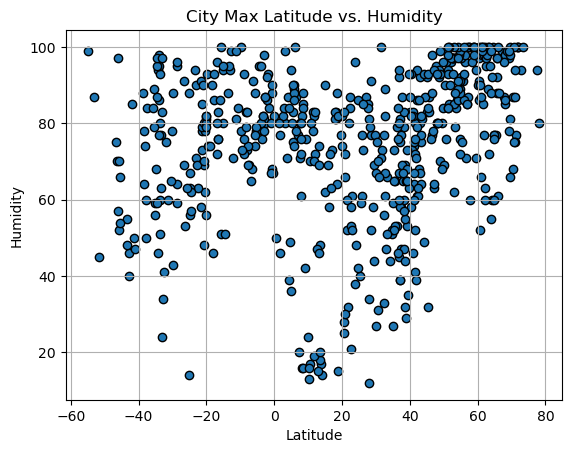

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolor='black', marker='o',label='Cities')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

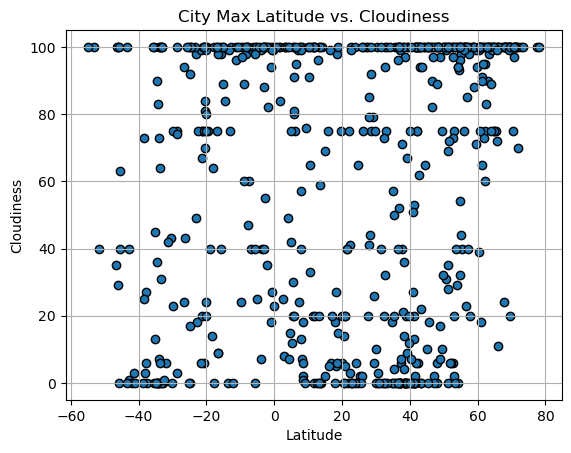

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolor='black', marker='o',label='Cities')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

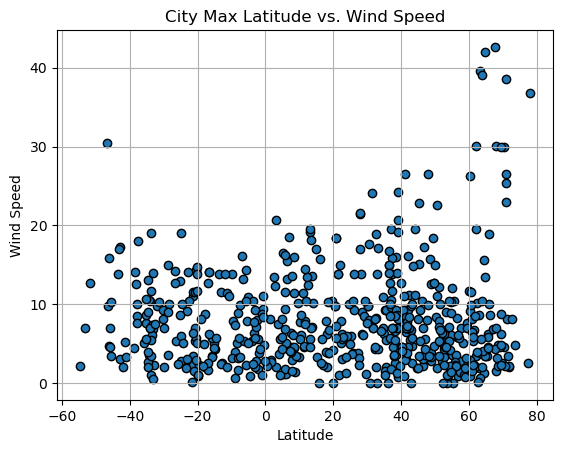

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolor='black', marker='o',label='Cities')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def lin_reg (x_values,y_values,title,txt_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,txt_coord,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,81.28,77,75,10.36,US,1675732268
2,saint george,37.1041,-113.5841,50.43,39,0,19.57,US,1675732259
7,susanville,40.4163,-120.6530,42.64,58,0,4.61,US,1675732271
11,ayan,56.4500,138.1667,-14.96,71,23,8.21,RU,1675732273
12,barrow,71.2906,-156.7887,-9.38,77,100,8.05,US,1675732274


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulladulla,-35.3500,150.4667,68.18,89,100,7.65,AU,1675732267
3,cape town,-33.9258,18.4232,74.37,86,100,10.36,ZA,1675732269
4,trairi,-3.2778,-39.2689,77.74,82,100,6.31,BR,1675731979
5,punta arenas,-53.1500,-70.9167,55.11,87,100,6.91,CL,1675732056
6,kavieng,-2.5744,150.7967,81.84,80,100,8.01,PG,1675732183


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7354913390894249


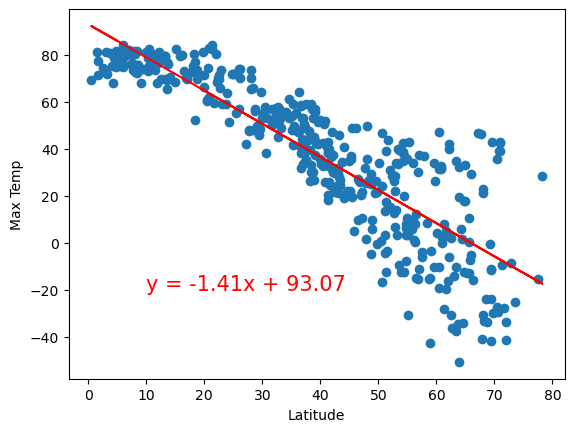

In [23]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Max Temp',(10,-20))

The r-value is: 0.2368909801213411


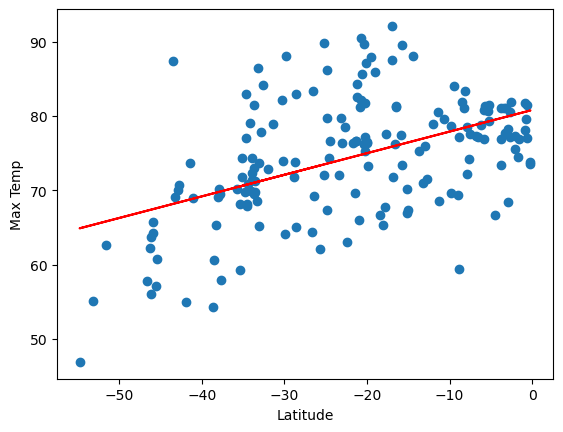

In [24]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Max Temp',(10,-20))

**Discussion about the linear relationship:** The northern hemisphere linear regression shows that as the latitude increases, the temperature drops. This makes sense because as you move north above the equator, the temperatures tend to drop, as it's warmer in Ecuador than in Norway. The r-value is also 0.74 which shows a strong relationship. The southern hemisphere linear regression shows that the lower the latitude, teh lower t

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


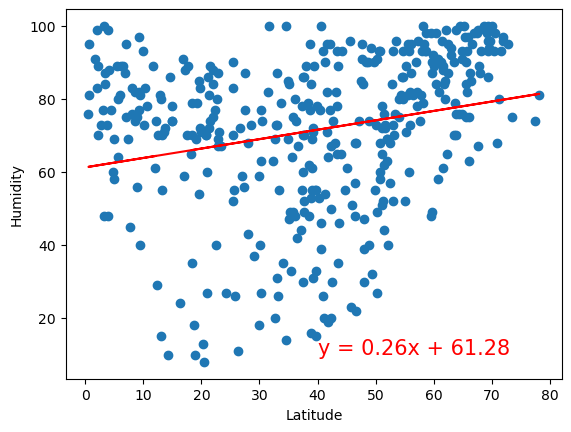

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


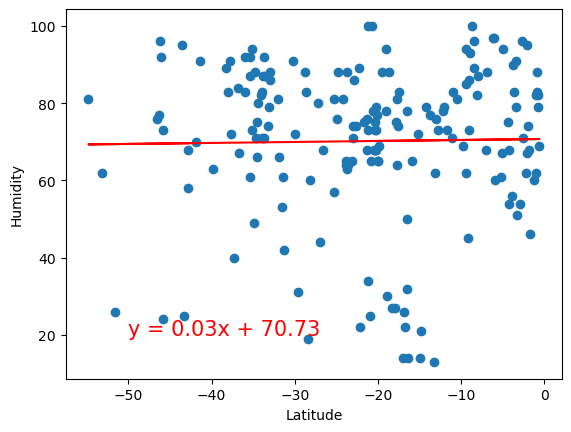

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


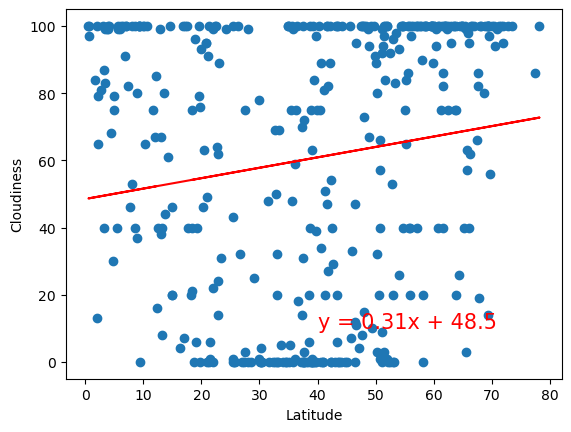

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


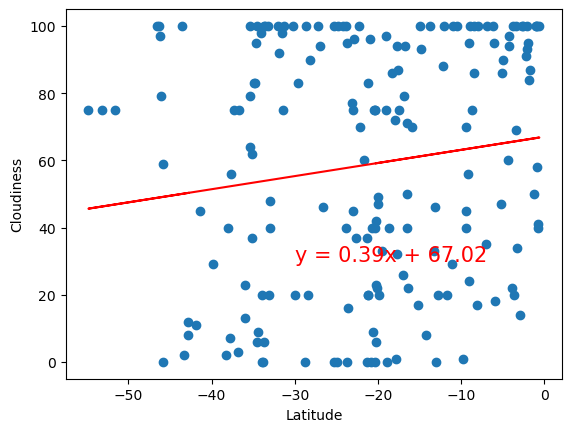

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


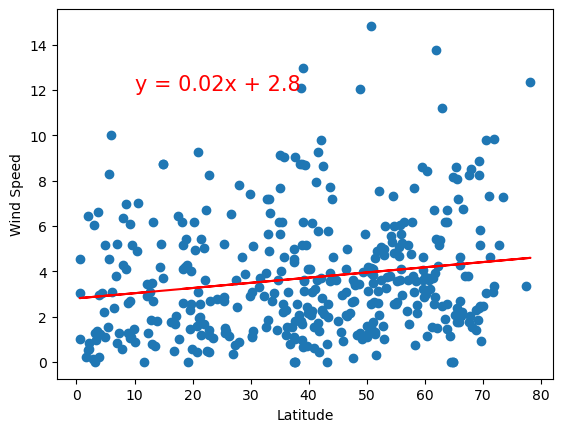

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


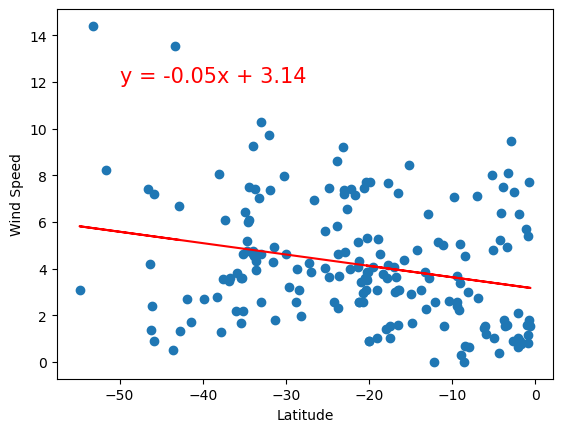

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE